In [84]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cmocean

### HFR 6km ###

Realtime High Frequency Radar data is processed and stored through [HFnet](http://cordc.ucsd.edu/projects/mapping/) at CORDC, a program at UCSD.

Hourly total current vectors are servered on the HFRnet THREDDS server: http://hfrnet-tds.ucsd.edu/thredds/HFRADAR_USWC_hourly_RTV.html.



In [85]:
# Get 6km data
ds = xr.open_dataset('http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/6km/hourly/RTV/HFRADAR_US_West_Coast_6km_Resolution_Hourly_RTV_best.ncd')

In [86]:
# Slice data through space and time
ds_subset = ds.sel(lat=slice(32.25, 34), lon=slice(-120.5, -117.25),time=slice('2018-04-10','2018-04-30'))
ds_subset.load() # load subsetted data into memory for debugging maps

<xarray.Dataset>
Dimensions:       (lat: 32, lon: 52, nProcParam: 7, nSites: 57, time: 504)
Coordinates:
  * lat           (lat) float32 32.29972 32.35366 32.4076 32.46154 32.51548 ...
  * lon           (lon) float32 -120.49046 -120.428 -120.36554 -120.30307 ...
  * time          (time) datetime64[ns] 2018-04-10 2018-04-10T01:00:00 ...
    time_run      (time) datetime64[ns] 2018-04-10 2018-04-10T01:00:00 ...
Dimensions without coordinates: nProcParam, nSites
Data variables:
    site_lat      (nSites) float32 37.08943 38.317318 38.319485 42.836666 ...
    site_lon      (nSites) float32 -122.27415 -123.072464 -123.073616 ...
    site_code     (nSites) |S64 b'BIGC                     ' ...
    site_netCode  (nSites) |S64 b'NPS                      ' ...
    procParams    (nProcParam) float32 10.0 100.0 2.0 3.0 0.0 0.0 10.0
    time_offset   (time) datetime64[ns] 2011-10-01 2011-10-01 2011-10-01 ...
    u             (time, lat, lon) float32 nan nan nan nan nan nan nan nan ...
    v      

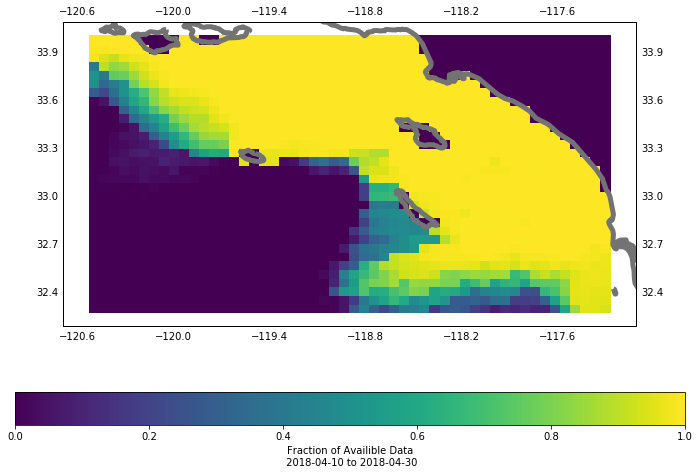

In [87]:
# Plot a heatmap of valid data
fig = plt.figure()
fig.set_size_inches(12,8)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('10m',lw=5,color='.45')
(np.isfinite(ds_subset['u']).sum('time')/len(ds_subset['time'])).plot(ax=ax,
                                                                        cbar_kwargs={'label': 'Fraction of Availible Data\n 2018-04-10 to 2018-04-30',
                                                                                     'spacing': 'proportional',
                                                                                     'orientation':'horizontal'})
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)

In [88]:
print((ds_subset['time'].values[-1] - ds_subset['time'].values[0]) / np.timedelta64(1, 'D'), "days of data")

20.958333333333332 days of data
